## MAFS6010Z Artificial Intelligence in Fintech
<br>

#### TANG Tsz Hong 20735194
#### LAM Chung Wai 20430732
#### CHAN Koon Lam 20748995

<br>

### Project 2   CODE

- [Data preprocessing](#point1)
- [Models](#point2)
    - [OLS H](#point2a) [OLS3 H](#point2b)
    - [PLS](#point2c)
    - [PCR](#point2d)
    - [Enet](#point2e)
    - [RF](#point2g)
    - [GBRT](#point2f)
- [Plot](#point3)

## Data preprocessing <a name="point1"></a>

In [93]:
#data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import timeit
#models
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

#plot
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#constuct filled_na_data.csv

#need extra 5GB storage

#data_drop_na=data.T.fillna(data.median(axis=1)).T #6m48s
#data_drop_na.to_csv(r'filled_na_data.csv') #7min

In [3]:
data=pd.read_csv(r'GKX_20201231.csv') #~1.5min
data2=pd.read_csv(r'PredictorData2020.csv')
data3=pd.read_csv(r'filled_na_data.csv') #~1.5min

In [4]:
def na_count(data):
    # number of na
    count_na = data.isnull().sum().values
    total = data.shape[0]
    # na percentage
    na_percentage = count_na/total
    return pd.DataFrame(data={'na_count':count_na, 'na_percentage':na_percentage}, index=data.columns.values)

def clean_data(data):
    missing_percent=na_count(data).sort_values(by=['na_percentage'],ascending=False)
    drop_features = list(missing_percent.loc[missing_percent['na_percentage']>0.65].index)
    data = data.drop(columns=drop_features)
    return data

In [5]:
data.shape

(4345508, 101)

In [6]:
data.describe()

,permno,DATE,mvel1,RET,prc,SHROUT,beta,betasq,chmom,dolvol,...,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia
count,4.345508e+06,4.345508e+06,4.341591e+06,4.345508e+06,4.324990e+06,4.345508e+06,3.939040e+06,3.939040e+06,4.001469e+06,3.989509e+06,...,4.344799e+06,4.033964e+06,4.344386e+06,4.341469e+06,4.023603e+06,4.039162e+06,4.033076e+06,3.794986e+06,2.895560e+06,2.895560e+06
mean,5.325557e+04,1.990655e+07,1.247499e+06,1.083914e-02,3.114100e+01,4.502779e+04,1.014689e+00,1.439388e+00,1.942932e-03,1.073903e+01,...,5.190970e-02,7.454232e-06,6.917272e-02,3.023371e-02,8.430522e-01,4.237665e+00,1.615366e+00,4.757172e+01,2.504760e+00,-6.097849e-01
std,2.874066e+04,1.989747e+05,6.074550e+06,1.740540e-01,1.347706e+03,2.316850e+05,6.367772e-01,1.695572e+00,5.339095e-01,3.041627e+00,...,7.091446e-02,9.183297e-05,7.181970e-02,2.554245e-02,3.988473e-01,1.228829e+01,3.685901e+00,1.969518e+01,2.609055e+01,2.510199e+01
min,1.000000e+04,1.926013e+07,0.000000e+00,-1.988095e+00,7.800000e-03,0.000000e+00,-1.933264e+00,0.000000e+00,-9.062534e+00,-3.060271e+00,...,-4.294743e-01,0.000000e+00,-1.592233e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.336618e-13,1.000000e+00,-4.868370e+01,-8.580376e+02
25%,2.312200e+04,1.980023e+07,1.896600e+04,-5.993700e-02,5.625000e+00,2.510000e+03,5.582666e-01,3.169580e-01,-2.333333e-01,8.606737e+00,...,1.836136e-02,1.007205e-08,2.717391e-02,1.410068e-02,5.367653e-01,6.995383e-01,1.955565e-08,3.400000e+01,3.387242e-01,-3.981607e-01
50%,5.669600e+04,1.994053e+07,8.348208e+04,0.000000e+00,1.370000e+01,8.240000e+03,9.484603e-01,9.030852e-01,-4.967448e-03,1.058229e+01,...,3.133757e-02,1.395408e-07,4.761905e-02,2.292672e-02,7.742686e-01,1.644015e+00,5.719790e-08,4.800000e+01,6.455899e-01,-1.054471e-01
75%,8.021200e+04,2.005093e+07,4.219743e+05,6.545500e-02,2.675000e+01,2.762200e+04,1.383421e+00,1.917538e+00,2.280141e-01,1.283319e+01,...,5.677935e-02,1.383451e-06,8.413795e-02,3.768173e-02,1.080470e+00,3.870057e+00,1.000000e+00,6.400000e+01,1.111978e+00,2.340464e-01
max,9.343600e+04,2.020123e+07,1.735365e+08,2.400000e+01,3.478150e+05,2.920640e+07,3.986823e+00,1.589475e+01,8.814493e+00,1.958487e+01,...,1.516084e+00,1.680000e-02,3.076923e+00,6.768897e-01,3.252102e+00,7.946859e+02,2.022224e+01,9.900000e+01,2.191461e+03,1.687620e+03


In [7]:
numUniqueValues = pd.DataFrame(columns = ["Feature", "Number_of_Unique_Values"])
for col in data.columns:
#     print(col)
#     print(len(data[col].unique()))
    numUniqueValues = numUniqueValues.append(pd.DataFrame({"Feature": [col],
                                                           "Number_of_Unique_Values": [len(data[col].unique())]}),
                                                          ignore_index=True)
    
with pd.option_context('display.max_rows', 500, 'display.max_columns', 500):
    display(numUniqueValues)

,Feature,Number_of_Unique_Values
0,permno,31925
1,DATE,1140
2,mvel1,2508629
3,RET,446776
4,prc,72376
5,SHROUT,201945
6,beta,3861743
7,betasq,3899986
8,chmom,3829584
9,dolvol,2261583


In [8]:
listCharacteristics = []
for i in data.columns:
    if i not in ['permno', 'DATE', 'RET', 'prc', 'SHROUT', 'mve0', 'sic2']:
        listCharacteristics.append(i)

listCharacteristics = sorted(listCharacteristics)
with pd.option_context('display.max_rows', 500, 'display.max_columns', 500):
    print("The 94 characteristics:")
    print(listCharacteristics)

The 94 characteristics:
['absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread', 'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chmom', 'chpmia', 'chtx', 'cinvest', 'convind', 'currat', 'depr', 'divi', 'divo', 'dolvol', 'dy', 'ear', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf', 'hire', 'idiovol', 'ill', 'indmom', 'invest', 'lev', 'lgr', 'maxret', 'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve_ia', 'mvel1', 'nincr', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq', 'roavol', 'roeq', 'roic', 'rsup', 'salecash', 'saleinv', 'salerec', 'secured', 'securedind', 'sgr', 'sin', 'sp', 'std_dolvol', 'std_turn', 'stdacc', 'stdcf', 'tang', 'tb', 'turn', 'zerotrade']


In [9]:
#modify data to the context
data['DATE'].astype(int)
data=data[(data['DATE']>=19570300) & (data['DATE']<20170000)]  #60 years data
data['year_index']=(data['DATE']//10000).rank(method='dense')
data['month_index']=(data['DATE']//100).rank(method='dense')
data=data.drop(['permno', 'DATE', 'prc', 'SHROUT', 'mve0', 'sic2'], axis=1)
data=data.reset_index(drop=True)

#8 macroeconomic data
data2=data2.iloc[1034:1752,:]
data2=data2.reset_index(drop=True)
data2['tms']=data2['lty']-data2['tbl']
data2['dfy']=data2['BAA']-data2['AAA']
data2=data2.drop(['yyyymm','Index','BAA', 'AAA', 'Rfree', 'infl','ltr', 'lty', 'csp','corpr','CRSP_SPvw','CRSP_SPvwx'], axis=1)
data2['month_index']=data2.index+1
data2['year_index']=data2.index//12+1
data2['RET']=data.groupby('month_index').mean().reset_index()['RET']
data2=data2.drop(['month_index'], axis=1)
data=data.drop(['month_index'], axis=1)

#the filled na version
data3['DATE'].astype(int)
data3=data3[(data3['DATE']>=19570300) & (data3['DATE']<20170000)]  #60 years data
data3['year_index']=(data3['DATE']//10000).rank(method='dense')
data3['month_index']=(data3['DATE']//100).rank(method='dense')
data3=data3.drop(['permno', 'DATE', 'prc', 'SHROUT', 'sic2'], axis=1)
data3=data3.reset_index(drop=True)
data3=data3.drop(data3.columns[0], axis=1)

In [11]:
#6mins
#Top 1000 each month
data3_top=pd.DataFrame()
for i in range(718):
    data3_top=data3_top.append(data3[data3['month_index']==i+1].nlargest(1000, 'mve0', keep='all'))

#bottom 1000 each month
data3_bottom=pd.DataFrame()
for i in range(718):
    data3_bottom=data3_bottom.append(data3[data3['month_index']==i+1].nsmallest(1000, 'mve0', keep='all'))

data3_top=data3_top.drop(['mve0','month_index'], axis=1).reset_index(drop=True)
data3_bottom=data3_bottom.drop(['mve0','month_index'], axis=1).reset_index(drop=True)
data3=data3.drop(['mve0','month_index'], axis=1).reset_index(drop=True)

## Models <a name="point2"></a>

## OLS H <a name="point2a"></a>

In [13]:
#choose 1
#data=databackup3
#data=data3_top_backup
#data=data3_bottom_backup


In [226]:
def OLSH(df,run_index):
    OLS_feature_importances = pd.DataFrame()
    OLS_df = pd.DataFrame()

    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = X_train.fillna(X_train.median())
        X_valid = X_valid.fillna(X_valid.median())
        X_test = X_test.fillna(X_test.median())

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999


        for epsilon in [1.35]:
            for alpha in [0.1]:
                OLSH = SGDRegressor(loss='huber',alpha=alpha,epsilon=epsilon,learning_rate='optimal')
                OLSH.fit(X_train, y_train)
                y_valid_pred=OLSH.predict(X_valid)
                y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
                score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
                score=score[0]
                if score > best_score:
                    best_score = score
                    best_parameters = {'epsilon':epsilon,'alpha':alpha}
                    best_model=OLSH

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf=pd.DataFrame(best_model.coef_)
        OLS_feature_importances = pd.concat([OLS_feature_importances,tempdf],axis=1)
        OLS_df=OLS_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)
         
        
        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)

        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(OLS_feature_importances,OLS_df)


In [670]:
#All
OLS_feature_importances,OLS_df=OLSH(data3,0)

0
r_oos:  -0.08236353479908032 e_head:  3266.8710011065077 best_score:  -0.13236134024574842
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  1.7898801440023817
1
r_oos:  0.004130483097455007 e_head:  2271.1056445110316 best_score:  -0.004415865612189096
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  1.9783954770100536
2
r_oos:  0.000610865248187098 e_head:  2203.797662519703 best_score:  -0.002709233285206558
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  2.210120920004556
3
r_oos:  -0.013656469425790352 e_head:  3204.9348513242244 best_score:  -0.005308436104363601
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  2.4669543509953655
4
r_oos:  -0.6085550893967322 e_head:  7085.053680107303 best_score:  -1.3294269463078892
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  2.3012800919968868
5
r_oos:  0.0012493935600769168 e_head:  4178.716645164604 best_score:  -0.01959055023490275
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  3.1105

In [228]:
#top
useless,OLS_df=OLSH(data3_top,29)

29
r_oos:  -1.6414744961380237 e_head:  249.11009024573997 best_score:  -1.345815184190534
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  2.067628083001182


In [229]:
#bottom
useless,OLS_df=OLSH(data3_bottom,29)

29
r_oos:  0.01025176483871948 e_head:  737.7330081915434 best_score:  0.0077953920717651615
best_parameters:  {'epsilon': 1.35, 'alpha': 0.1}
Time:  2.1469032170061837


In [ ]:
#macro
OLSmac_feature_importances,useless=OLSH(data2,0)

## OLS-3 H <a name="point2b"></a>

In [70]:
def OLS3H(df):
    OLS3_feature_importances = pd.DataFrame()
    OLS3_df = pd.DataFrame()

    for i in range(30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = X_train.fillna(X_train.median())
        X_valid = X_valid.fillna(X_valid.median())
        X_test = X_test.fillna(X_test.median())

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999


        for epsilon in [1,1.35,2,3,4,5,10]:
            for alpha in [0.0001,0.001,0.01,0.1]:
                OLSH = SGDRegressor(loss='huber',alpha=alpha,epsilon=epsilon,learning_rate='optimal')
                OLSH.fit(X_train, y_train)
                y_valid_pred=OLSH.predict(X_valid)
                y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
                score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
                score=score[0]
                if score > best_score:
                    best_score = score
                    best_parameters = {'epsilon':epsilon,'alpha':alpha}
                    best_model=OLSH

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf=pd.DataFrame(best_model.coef_)
        OLS3_feature_importances = pd.concat([OLS3_feature_importances,tempdf],axis=1)
        OLS3_df=OLS3_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)
         
        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)

        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(OLS3_feature_importances,OLS3_df)


In [71]:
#All
data_OLS3=data3[["RET" ,"bm", "mom12m", "mom1m", "mom36m", "mom6m", "mvel1", "year_index"]]
OLS3_feature_importances,OLS3_df=OLS3H(data_OLS3)

0
r_oos:  -0.0012189880993960234 e_head:  3021.9544291893467 best_score:  -0.010354941211818236
best_parameters:  {'epsilon': 10, 'alpha': 0.0001}
Time:  22.56532626199987
1
r_oos:  0.004406593848492402 e_head:  2270.4759669533314 best_score:  -0.003525537558654923
best_parameters:  {'epsilon': 10, 'alpha': 0.1}
Time:  26.58351626000149
2
r_oos:  0.0031110241874025 e_head:  2198.2844502637595 best_score:  -0.0010081564113888497
best_parameters:  {'epsilon': 2, 'alpha': 0.1}
Time:  29.219474211000488
3
r_oos:  -0.018537739946042686 e_head:  3220.3682397363364 best_score:  -0.0007080271322315035
best_parameters:  {'epsilon': 2, 'alpha': 0.01}
Time:  36.77348550199895
4
r_oos:  0.01162695805788072 e_head:  4353.395232958496 best_score:  -0.00040601099064341284
best_parameters:  {'epsilon': 1.35, 'alpha': 0.01}
Time:  36.12136501900022
5
r_oos:  0.007814320173262557 e_head:  4151.249359602107 best_score:  -0.0002492191355103479
best_parameters:  {'epsilon': 1.35, 'alpha': 0.01}
Time:  39.3

In [72]:
#top 1000
data_OLS3=data3_top[["RET" ,"bm", "mom12m", "mom1m", "mom36m", "mom6m", "mvel1", "year_index"]]
useless,OLS3_Top_df=OLS3H(data_OLS3)

0
r_oos:  0.012155080772030202 e_head:  194.39250084516732 best_score:  -0.01238690159615019
best_parameters:  {'epsilon': 4, 'alpha': 0.1}
Time:  8.52984229300273
1
r_oos:  0.037337707248804364 e_head:  83.43018948140688 best_score:  -0.0035104055690036162
best_parameters:  {'epsilon': 1, 'alpha': 0.01}
Time:  9.289633035001316
2
r_oos:  0.06377834192106602 e_head:  75.78463901185626 best_score:  -0.002068560658782692
best_parameters:  {'epsilon': 4, 'alpha': 0.1}
Time:  9.772008415002347
3
r_oos:  -0.016050110530366313 e_head:  125.71571691665515 best_score:  -0.008059193215256055
best_parameters:  {'epsilon': 1, 'alpha': 0.1}
Time:  8.356667768999614
4
r_oos:  0.06210169627922557 e_head:  118.57734696204125 best_score:  -0.005598952981432426
best_parameters:  {'epsilon': 1, 'alpha': 0.1}
Time:  8.393826370996976
5
r_oos:  0.04003196838180134 e_head:  82.40680780306151 best_score:  -0.004341101332717701
best_parameters:  {'epsilon': 1, 'alpha': 0.1}
Time:  9.593125053997937
6
r_oos: 

In [73]:
#bottom 1000
data_OLS3=data3_bottom[["RET" ,"bm", "mom12m", "mom1m", "mom36m", "mom6m", "mvel1", "year_index"]]
useless,OLS3_bottom_df=OLS3H(data_OLS3)

0
r_oos:  -0.0011886533996172677 e_head:  780.9552091816961 best_score:  -5.828321442469253e-05
best_parameters:  {'epsilon': 2, 'alpha': 0.1}
Time:  7.526596073999826
1
r_oos:  -0.012922827000407144 e_head:  726.3331508057727 best_score:  -0.0006150317689075369
best_parameters:  {'epsilon': 3, 'alpha': 0.001}
Time:  8.971328292002
2
r_oos:  -0.0038984101246384295 e_head:  758.5680311755099 best_score:  -0.0030836112576608787
best_parameters:  {'epsilon': 1, 'alpha': 0.1}
Time:  9.503799865000474
3
r_oos:  -0.005491585690317047 e_head:  1229.3058022114792 best_score:  -0.005094259873331897
best_parameters:  {'epsilon': 1, 'alpha': 0.1}
Time:  11.367727488002856
4
r_oos:  -0.02723252967247669 e_head:  1607.0706378292373 best_score:  -0.008347015060060192
best_parameters:  {'epsilon': 3, 'alpha': 0.001}
Time:  14.009403976000613
5
r_oos:  -0.002248822548788443 e_head:  1512.9760949449624 best_score:  -0.008968045369439626
best_parameters:  {'epsilon': 2, 'alpha': 0.01}
Time:  15.47245390

In [74]:
#macro
OLS3mac_feature_importances,useless=OLSH(data2)

## PLS <a name="point2c"></a>

In [231]:
def PLS(df,run_index):
    
    PLS_feature_importances=pd.DataFrame()
    PLS_df = pd.DataFrame()
    
    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999

        #find the model
        for K in [1,2,3,4,5,6]:
            PLS = PLSRegression(n_components=K)
            PLS.fit(X_train,y_train)
            y_valid_pred=PLS.predict(X_valid)
            y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
            score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
            score=score[0]
            if score > best_score:
                best_score = score
                best_parameters = {'K':K}
                best_model=PLS

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf =pd.DataFrame(best_model.coef_)
        PLS_feature_importances = pd.concat([PLS_feature_importances,tempdf],axis=1)
        PLS_df=PLS_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(PLS_feature_importances,PLS_df)

In [232]:
#All
PLS_feature_importances,PLS_df=PLS(data3,29)

29
r_oos:  0.008876279108704366 e_head:  1815.1539329378543 best_score:  -0.0005714038364410534
best_parameters:  {'K': 3}
Time:  94.73454623099678


In [446]:
#All
PLS_feature_importances,PLS_df=PLS(data3,0)

0
r_oos:  -0.0005673607107956613 e_head:  3019.987638410738 best_score:  -0.014321175865876556
best_parameters:  {'K': 1}
Time:  12.556821300000593
1
r_oos:  -0.00041106464988627245 e_head:  2281.462759121672 best_score:  -0.0037189963312649343
best_parameters:  {'K': 5}
Time:  12.098675339999318
2
r_oos:  0.0032113712549795004 e_head:  2198.0631704586494 best_score:  -0.0012819459575630354
best_parameters:  {'K': 1}
Time:  14.73669179600256
3
r_oos:  -0.011458490566344182 e_head:  3197.985377551218 best_score:  -0.0006567728335349354
best_parameters:  {'K': 1}
Time:  15.15445241999987
4
r_oos:  0.011152566474418757 e_head:  4355.484741646371 best_score:  -0.00014083316117319278
best_parameters:  {'K': 1}
Time:  17.69570643499901
5
r_oos:  0.006686679183074085 e_head:  4155.967346399899 best_score:  -0.000248001978000012
best_parameters:  {'K': 1}
Time:  24.50766478600417
6
r_oos:  0.010170088865067317 e_head:  2935.218794917935 best_score:  -0.0005446608175456724
best_parameters:  {'K

In [447]:
PLS_feature_importances.to_csv(r'PLS.csv')

In [448]:
PLS_df.to_csv(r'PLS2.csv')

In [233]:
#top 1000
useless,PLS_Top_df=PLS(data3_top,29)

29
r_oos:  0.0485145342039458 e_head:  89.73193971719493 best_score:  -0.0007491596256987698
best_parameters:  {'K': 1}
Time:  11.411296477999713


In [234]:
#bottom 1000
useless,PLS_bottom_df=PLS(data3_bottom,29)

29
r_oos:  0.007619643303896639 e_head:  739.6949242312261 best_score:  0.005682879273213093
best_parameters:  {'K': 3}
Time:  14.959980901003291


In [235]:
#macro
PLSmac_feature_importances,useless=PLS(data2,0)

0
r_oos:  0.21625038419955012 e_head:  0.0705172350728799 best_score:  -0.05431324378031577
best_parameters:  {'K': 1}
Time:  0.10407436100649647
1
r_oos:  0.32885380101245165 e_head:  0.007068923115968838 best_score:  0.04678466431241313
best_parameters:  {'K': 1}
Time:  0.10203144900151528
2
r_oos:  -0.6276369760368292 e_head:  0.013275593747730607 best_score:  0.05096053828886038
best_parameters:  {'K': 1}
Time:  0.0998801719979383
3
r_oos:  0.3494872018794324 e_head:  0.033561741148365416 best_score:  0.05221227710013687
best_parameters:  {'K': 1}
Time:  0.10068425699864747
4
r_oos:  0.42098251151097577 e_head:  0.022154487659343667 best_score:  0.08201843158069666
best_parameters:  {'K': 1}
Time:  0.10028126899851486
5
r_oos:  0.3464519571772635 e_head:  0.009700198582239297 best_score:  0.17639611828500779
best_parameters:  {'K': 4}
Time:  0.09636819300067145
6
r_oos:  0.09813168354239943 e_head:  0.00909012465757194 best_score:  0.22758687896638352
best_parameters:  {'K': 4}
Tim

## PCR <a name="point2d"></a>

In [580]:
def create_importance_df(pca, X_test):

    df = pd.DataFrame(pca.components_)
    df.columns  = X_test.columns
    df =df.apply(np.abs).T
    num_pcs = df.shape[1]
    df.columns  = [f'PC{i}' for i in range(1, num_pcs + 1)]
    return df

In [581]:
def PCR(df,run_index):
    
    PCR_feature_importances=pd.DataFrame()
    PCR_df = pd.DataFrame()

    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999

        #find the model
        for K in [0.95]:
            PCR = PCA(n_components=K)
            PCR.fit(X_train)
            X_train_PCR = PCR.transform(X_train)
            X_valid_PCR = PCR.transform(X_valid)
            Lin=LinearRegression()
            Lin.fit(X_train_PCR,y_train)
            y_valid_pred=Lin.predict(X_valid_PCR)
            y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
            score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
            score=score[0]
            if score > best_score:
                best_score = score
                best_parameters = {'K':K}
                best_model=PCR
                best_model2=Lin

        X_test_PCR = best_model.transform(X_test)
        y_pred=best_model2.predict(X_test_PCR)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        
        n_pcs= best_model.components_.shape[0]
        most_important = [np.abs(best_model.components_[i]).argmax() for i in range(n_pcs)]


        tempdf =create_importance_df(best_model,X_test)
        PCR_feature_importances = pd.concat([PCR_feature_importances,tempdf],axis=1)
        PCR_df=PCR_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(PCR_feature_importances,PCR_df)

In [671]:
#All
PCR_feature_importances,PCR_df=PCR(data3,0)

0
r_oos:  -0.01506024248021931 e_head:  3063.7311438530055 best_score:  -0.019170218904102754
best_parameters:  {'K': 0.95}
Time:  2.300671503995545
1
r_oos:  0.003665116538949631 e_head:  2272.166924728821 best_score:  -0.0039374893131989275
best_parameters:  {'K': 0.95}
Time:  2.538001899010851
2
r_oos:  0.0012940217239358898 e_head:  2202.2912036319303 best_score:  -0.0030491806434156388
best_parameters:  {'K': 0.95}
Time:  2.9641876759997103
3
r_oos:  -0.011618407893082328 e_head:  3198.4909971859297 best_score:  -0.0006488039306780102
best_parameters:  {'K': 0.95}
Time:  3.256673598996713
4
r_oos:  0.011476214361362813 e_head:  4354.059199762498 best_score:  -0.00029489853720021664
best_parameters:  {'K': 0.95}
Time:  3.237951882998459
5
r_oos:  0.006526956558382757 e_head:  4156.635616923194 best_score:  -0.00030504640756090495
best_parameters:  {'K': 0.95}
Time:  4.6154422010004055
6
r_oos:  0.010113272033018927 e_head:  2935.387278241605 best_score:  -0.000553141156440784
best_

In [598]:
#top 1000
useless,PCR_Top_df=PCR(data3_top,29)

29
r_oos:  0.0541135397753586 e_head:  89.20391312249555 best_score:  -0.0021017872270596705
best_parameters:  {'K': 0.95}
Time:  2.365636515998631


In [599]:
#bottom 1000
useless,PCR_bottom_df=PCR(data3_bottom,29)

29
r_oos:  -5.4618640319192835e-05 e_head:  745.4151227106239 best_score:  -0.00011655079960415371
best_parameters:  {'K': 0.95}
Time:  2.5499183210049523


In [600]:
#macro
PCRmac_feature_importances,useless=PCR(data2,0)

0
r_oos:  0.5127023640197514 e_head:  0.04384420898475688 best_score:  -0.2001291552723936
best_parameters:  {'K': 0.95}
Time:  0.023362292995443568
1
r_oos:  -0.010066472021313722 e_head:  0.010638639157172705 best_score:  0.10471228873940275
best_parameters:  {'K': 0.95}
Time:  0.02048424600798171
2
r_oos:  0.023681359825006187 e_head:  0.007963206676994733 best_score:  0.13827397435546918
best_parameters:  {'K': 0.95}
Time:  0.019535330997314304
3
r_oos:  0.30994156901647507 e_head:  0.035602008914855814 best_score:  0.12472607057138452
best_parameters:  {'K': 0.95}
Time:  0.022603988007176667
4
r_oos:  0.24423753878210275 e_head:  0.028917140593007304 best_score:  0.18722960813323697
best_parameters:  {'K': 0.95}
Time:  0.01965381600894034
5
r_oos:  0.09440644825230482 e_head:  0.01344115001677186 best_score:  0.1848304577836809
best_parameters:  {'K': 0.95}
Time:  0.01959487600834109
6
r_oos:  0.32259363592127455 e_head:  0.0068277243816422155 best_score:  0.2052937201857844
best_

## Enet <a name="point2e"></a>

In [ ]:
#+Huber

#tune
#rho=0.5  (=rho   or   l1_ratio) 
#lambda = (10^-4,10^-1) = (0.0001,0.1)  (=alpha)

In [114]:
def Enet(df,run_index):
    
    Enet_feature_importances=pd.DataFrame()
    Enet_df = pd.DataFrame()
    
    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999

        for epsilon in [1,1.35,2,3]:
            for alpha in [0.0001,0.001]:
                Enet = SGDRegressor(loss='huber',penalty='elasticnet',alpha=alpha,epsilon=epsilon,l1_ratio=0.5,learning_rate='optimal')
                Enet.fit(X_train, y_train)
                y_valid_pred=Enet.predict(X_valid)
                y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
                score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
                score=score[0]
                if score > best_score:
                    best_score = score
                    best_parameters = {'epsilon':epsilon,'alpha':alpha}
                    best_model=Enet

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf =pd.DataFrame(best_model.coef_)
        Enet_feature_importances = pd.concat([Enet_feature_importances,tempdf],axis=1)
        Enet_df=Enet_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(Enet_feature_importances,Enet_df)

In [84]:
#All
Enet_feature_importances,Enet_df=Enet(data3)

0
r_oos:  -0.014834744205299844 e_head:  3063.050528004957 best_score:  -0.007704397751596703
best_parameters:  {'epsilon': 1, 'alpha': 0.0001}
Time:  28.48847079900588
1
r_oos:  0.004575066136604744 e_head:  2270.0917616352835 best_score:  -0.0038881470090177395
best_parameters:  {'epsilon': 1.35, 'alpha': 0.001}
Time:  32.18892722900637
2
r_oos:  0.0020461842965170396 e_head:  2200.6325763148534 best_score:  -0.0023349971722335106
best_parameters:  {'epsilon': 3, 'alpha': 0.001}
Time:  39.412808809000126
3
r_oos:  -0.011237434874572738 e_head:  3197.2864532982676 best_score:  -0.0017741092719409934
best_parameters:  {'epsilon': 3, 'alpha': 0.001}
Time:  37.88640055200085
4
r_oos:  0.010200888342969505 e_head:  4359.676510204345 best_score:  -3.9252314421034384e-07
best_parameters:  {'epsilon': 3, 'alpha': 0.0001}
Time:  47.15125166499638
5
r_oos:  0.00741802659141344 e_head:  4152.907429771143 best_score:  -0.0012547120724333283
best_parameters:  {'epsilon': 1.35, 'alpha': 0.0001}
Ti

In [115]:
#top 1000
useless,Enet_Top_df=Enet(data3_top,29)

29
r_oos:  0.04153723128101139 e_head:  90.3899496897861 best_score:  0.001027966007086989
best_parameters:  {'epsilon': 3, 'alpha': 0.0001}
Time:  47.42906772399874


In [116]:
#bottom 1000
useless,Enet_bottom_df=Enet(data3_bottom,29)

29
r_oos:  0.008446537164198409 e_head:  739.0785787068351 best_score:  0.007229572719550936
best_parameters:  {'epsilon': 3, 'alpha': 0.001}
Time:  52.202956768996955


In [117]:
#macro
Enetmac_feature_importances,useless=Enet(data2,0)

0
r_oos:  0.231769016195307 e_head:  0.06912095876423169 best_score:  -0.8310025740390925
best_parameters:  {'epsilon': 1, 'alpha': 0.001}
Time:  0.13836162100051297
1
r_oos:  0.11308752068699701 e_head:  0.009341505824386316 best_score:  -0.00734689910749875
best_parameters:  {'epsilon': 1, 'alpha': 0.001}
Time:  0.08261661899450701
2
r_oos:  -1.0998734241314856 e_head:  0.01712732440393688 best_score:  -0.5614747347642648
best_parameters:  {'epsilon': 1, 'alpha': 0.001}
Time:  0.08543623200239381
3
r_oos:  0.16883039965137092 e_head:  0.04288232154368899 best_score:  -0.053832513345656974
best_parameters:  {'epsilon': 2, 'alpha': 0.001}
Time:  0.0835439949951251
4
r_oos:  0.3609150439042822 e_head:  0.02445280160715415 best_score:  -0.16573534674111046
best_parameters:  {'epsilon': 3, 'alpha': 0.0001}
Time:  0.08716621000348823
5
r_oos:  0.048092575850811614 e_head:  0.014128557414499816 best_score:  -0.01631764870941943
best_parameters:  {'epsilon': 1.35, 'alpha': 0.0001}
Time:  0.1

## RF <a name="point2g"></a>

In [ ]:
#tune
#depth = 1 ~ 6 (=max_depth)
#tree = 300  (=n_estimators)
#Features in each split ∈ {3, 5, 10, 20, 30, 50...  (=NOT SURE)

#min_samples_split or min_samples_leaf is the required??

In [409]:
def RF(df,run_index,max_depth,min_samples_split):
    
    RF_feature_importances=pd.DataFrame()
    RF_df = pd.DataFrame()
    
    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        start = timeit.default_timer()

        best_score=-99999
        

        RF = RandomForestRegressor(max_depth=max_depth, n_estimators=10, min_samples_split=min_samples_split,n_jobs=-1)
        RF.fit(X_train, y_train)
        y_valid_pred=RF.predict(X_valid)
        y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
        score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
        score=score[0]
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
            best_model=RF

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf =pd.DataFrame(best_model.feature_importances_)
        RF_feature_importances = pd.concat([RF_feature_importances,tempdf],axis=1)
        RF_df=RF_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(RF_feature_importances,RF_df)

In [411]:
#All
RF_feature_importances,RF_df=RF(data3,29,4,5)

29
r_oos:  0.006624415318328802 e_head:  1819.2780188913866 best_score:  -0.0006229352933586618
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  124.86598902299738


In [672]:
#All
RF_feature_importances,RF_df=RF(data3,0,4,5)

0
r_oos:  -0.08644668175256065 e_head:  3279.195062243746 best_score:  -0.1078909871908984
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  14.020691536003142
1
r_oos:  -0.019199371695751255 e_head:  2324.3099689804376 best_score:  -0.018925239117956405
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  17.300141546991654
2
r_oos:  -0.0078118177533741395 e_head:  2222.3708973744074 best_score:  -0.007630577843774411
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  19.922232921991963
3
r_oos:  -0.05281767633883572 e_head:  3328.753048752231 best_score:  -0.007486087928922247
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  22.563447242995608
4
r_oos:  0.0074758907213161585 e_head:  4371.679054944556 best_score:  -0.016124253371603725
best_parameters:  {'max_depth': 4, 'min_samples_split': 5}
Time:  24.544392611991498
5
r_oos:  0.02660663911252359 e_head:  4072.6233488178464 best_score:  -0.007313541185761663
best_paramete

In [406]:
#top 1000
useless,RF_Top_df=RF(data3_top,29,5,20)

29
r_oos:  0.005091441090973814 e_head:  93.82705048201089 best_score:  0.017236923420058337
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  23.446785626998462


In [413]:
#bottom 1000
useless,RF_Top_df=RF(data3_bottom,29,2,3)

29
r_oos:  0.002854129588404697 e_head:  743.2470162118044 best_score:  0.006711207359800131
best_parameters:  {'max_depth': 2, 'min_samples_split': 3}
Time:  8.555679503995634


In [405]:
#macro
RFmac_feature_importances,useless=RF(data2,0)

0
r_oos:  -0.9623361511756869 e_head:  0.1765596012741125 best_score:  -0.4593386908470318
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  0.04596297999523813
1
r_oos:  -0.26260141914258717 e_head:  0.013298491999949003 best_score:  -0.29041800823930264
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  0.040843136004696134
2
r_oos:  0.3468578854260502 e_head:  0.005327262467169015 best_score:  -0.35422693061480093
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  0.040983211001730524
3
r_oos:  0.13040348618884068 e_head:  0.04486487150502126 best_score:  -0.16953890795483106
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  0.043958914997347165
4
r_oos:  0.44347293104080865 e_head:  0.021293954546211993 best_score:  -1.0241172988344274
best_parameters:  {'max_depth': 5, 'min_samples_split': 20}
Time:  0.04029713000636548
5
r_oos:  0.07491324981223657 e_head:  0.013730475182608132 best_score:  -0.7441560803287104
best

## GBRT <a name="point2f"></a>

In [ ]:
#+Huber

#tune
#depth = 1 ~ 2   (=max_depth)
#tree = 1 ~ 100  (=n_estimators)
#Learning Rate LR ∈ {0.01, 0.1}

In [452]:
def GBRT(df,run_index,max_depth,n_estimators,learning_rate):
    
    GBRT_feature_importances=pd.DataFrame()
    GBRT_df = pd.DataFrame()
    
    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999

        GBRT = GradientBoostingRegressor(loss='huber', alpha=0.999, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
        GBRT.fit(X_train, y_train)
        
        y_valid_pred=GBRT.predict(X_valid)
        y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])

        y_pred=GBRT.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf =pd.DataFrame(GBRT.feature_importances_)
        GBRT_feature_importances = pd.concat([GBRT_feature_importances,tempdf],axis=1)
        GBRT_df=GBRT_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0]}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0])

        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(GBRT_feature_importances,GBRT_df)

In [ ]:
#max_depth = [1, 2]
#n_estimators = [1, 2, ... , 99, 100]
#learning_rate = [0.01,0.001]

#def GBRT(df,run_index,max_depth,n_estimators,learning_rate):

In [673]:
#All
GBRT_feature_importances,GBRT_df=GBRT(data3,0,2,60,0.01)

0
r_oos:  -0.0040572437684052165 e_head:  3030.5210658513383
Time:  393.0575443280104
1
r_oos:  0.003119527151180579 e_head:  2273.41115513965
Time:  455.44448514400574
2
r_oos:  0.002646942726070467 e_head:  2199.307817042663
Time:  533.371157112997
3
r_oos:  -0.010530391016147167 e_head:  3195.050952838663
Time:  562.9488113330008
4
r_oos:  0.01078824506885978 e_head:  4357.089434412079
Time:  620.6645031399967
5
r_oos:  0.009030957540230755 e_head:  4146.1590169442925
Time:  657.0666596080118
6
r_oos:  0.011751294201416074 e_head:  2930.5299250730604
Time:  726.5653651339962
7
r_oos:  -0.011074637693670342 e_head:  2230.157693293536
Time:  793.8634352880035
8
r_oos:  0.007179756457232678 e_head:  2715.251755753012
Time:  854.6733987390035
9
r_oos:  0.005384450591343404 e_head:  3060.482698129797
Time:  925.4869089260028
10
r_oos:  0.004034905894811813 e_head:  3254.3444618865974
Time:  1007.9424925710045
11
r_oos:  -0.0009193012887267482 e_head:  5216.806472842636
Time:  1102.101497

In [474]:
#top 1000
useless,GBRT_Top_df=GBRT(data3_top,29,2,10,0.01)

29
r_oos:  0.03548244314648474 e_head:  90.96095986641889
Time:  90.98234339299961


In [475]:
#bottom 1000
useless,GBRT_bottom_df=GBRT(data3_bottom,29,2,10,0.01)

29
r_oos:  0.0016440074558997653 e_head:  744.1490102840106
Time:  102.02819653700863


In [754]:
#macro
GBRTmac_feature_importances,useless=GBRT(data2,0,2,60,0.01)

0
r_oos:  0.11382173722877753 e_head:  0.07973316938534282
Time:  0.08179800299694762
1
r_oos:  0.02473448551768953 e_head:  0.010272094142723663
Time:  0.07606049597961828
2
r_oos:  0.23984245235393054 e_head:  0.006200118905747964
Time:  0.07997458497993648
3
r_oos:  0.08167372329691747 e_head:  0.04737897375347054
Time:  0.08198061800794676
4
r_oos:  0.07435952300475446 e_head:  0.03541704859052609
Time:  0.07163894199766219
5
r_oos:  0.2096816987985265 e_head:  0.011730192675233269
Time:  0.07407808702555485
6
r_oos:  0.4332232522730086 e_head:  0.005712664693763824
Time:  0.07737507502315566
7
r_oos:  -1.2972088649903486 e_head:  0.018611314319332734
Time:  0.07227878100820817
8
r_oos:  0.4210479972301573 e_head:  0.007497404114518845
Time:  0.07479513398720883
9
r_oos:  0.33910512541649385 e_head:  0.015308525192324349
Time:  0.08008804800920188
10
r_oos:  0.016879050273311047 e_head:  0.026374802716767152
Time:  0.0740884380065836
11
r_oos:  0.12907360284410574 e_head:  0.053336

In [669]:
GBRTmac_feature_importances

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.122007,0.033269,0.022625,0.024807,0.027250,0.023601,0.000000,0.000000,0.002807,0.007201,...,0.001776,0.000827,0.000000,0.000000,0.000000,0.001274,0.000000,0.000000,0.000952,0.002157
1,0.062094,0.010050,0.011233,0.014670,0.006676,0.004040,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001797,0.000785,0.000865,0.000000,0.002345,0.005833,0.000000,0.005410,0.000933
2,0.003106,0.030009,0.034755,0.018388,0.016425,0.010575,0.084763,0.074507,0.176790,0.217164,...,0.052537,0.047069,0.053164,0.049221,0.043038,0.058335,0.065090,0.051006,0.051833,0.041500
3,0.000000,0.003592,0.006911,0.017804,0.006200,0.007382,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000994,0.000000,0.000000,0.000000,0.000000,0.000895,0.002024,0.000000,0.002898
4,0.073683,0.148278,0.145912,0.156106,0.179940,0.161164,0.225732,0.215684,0.226987,0.244674,...,0.072476,0.075869,0.077550,0.080283,0.084197,0.126791,0.148562,0.126363,0.148472,0.172807
5,0.494305,0.398694,0.404250,0.399324,0.387630,0.380191,0.559766,0.569302,0.374833,0.386145,...,0.665216,0.662304,0.656900,0.664439,0.674032,0.678249,0.697821,0.745362,0.707187,0.645909
6,0.000000,0.009483,0.005792,0.000000,0.008022,0.004206,0.002120,0.003038,0.163956,0.077604,...,0.000000,0.000000,0.000000,0.000966,0.000825,0.000939,0.001035,0.000000,0.017028,0.035836
7,0.244805,0.366625,0.368523,0.368900,0.367857,0.408841,0.127618,0.137470,0.054627,0.067213,...,0.207995,0.211140,0.211601,0.204227,0.197907,0.132067,0.080764,0.075245,0.069118,0.097960


## NN (Todo in the future)<a name="point2h"></a>

In [213]:
def NN(hiddenlayer,df,run_index,lr):
    
    RF_feature_importances=pd.DataFrame()
    RF_df = pd.DataFrame()
    
    for i in range(run_index,30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()
        
        input_size=len(X_train.columns)
        
        start = timeit.default_timer()

        best_score=-99999
        
        for learning_rate in [0.01]: #0.001,0.01
            for lambd in [0.001]: #0.00001,0.0001,0.001
                model = Sequential()

                #4 hidden layer NN4
                model.add(layers.Dense(32, input_dim=input_size, activation="relu"))
                if (hiddenlayer>=2): model.add(layers.Dense(16, activation="relu"))
                if (hiddenlayer>=3): model.add(layers.Dense(8, activation="relu"))
                if (hiddenlayer>=4): model.add(layers.Dense(4, activation="relu"))
                if (hiddenlayer>=5): model.add(layers.Dense(2, activation="relu"))
                model.add(layers.Dense(1, activation="relu")) #output layer (not count as hidden layer)

                model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

                my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),]
                model.fit(X_train, y_train, epochs=100, batch_size=10000,validation_data=(X_valid, y_valid),callbacks=my_callbacks)
                score= model.evaluate(X_valid, y_valid)[0]
                
                #number of epochs(iterations)
                #cannot fit complete data at once so we use batch size

                if score > best_score:
                    best_score = score
                    #best_parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
                    best_model= model

        #X_test=X_test.to_numpy()
        y_pred=best_model.predict(X_test)
        #= pred.eval(feed_dict = {x:testX})
        y_pred=pd.DataFrame(y_pred,columns=["RET"])
        print(y_pred)
        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        #tempdf =pd.DataFrame(best_model.feature_importances_)
        #RF_feature_importances = pd.concat([RF_feature_importances,tempdf],axis=1)
        RF_df=RF_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        #print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(RF_feature_importances,RF_df)

In [214]:
#macro
RFmac_feature_importances,useless=NN(1,data3,29,0.0001)

Epoch 1/100
282/282 [==============================] - 4s 11ms/step - loss: 0.1829 - accuracy: 0.0581 - val_loss: 0.2539 - val_accuracy: 0.0054
Epoch 2/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1805 - accuracy: 0.0581 - val_loss: 0.2977 - val_accuracy: 0.0053
Epoch 3/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.2382 - val_accuracy: 0.0054
Epoch 4/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.2376 - val_accuracy: 0.0054
Epoch 5/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.2333 - val_accuracy: 0.0054
Epoch 6/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.2329 - val_accuracy: 0.0054
Epoch 7/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.2328 - val_accuracy: 0.005

In [215]:
#macro
RFmac_feature_importances,useless=NN(2,data3,29,0.0001)

Epoch 1/100
282/282 [==============================] - 5s 13ms/step - loss: 0.1807 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 2/100
282/282 [==============================] - 3s 9ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 3/100
282/282 [==============================] - 3s 9ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 4/100
282/282 [==============================] - 3s 10ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 5/100
282/282 [==============================] - 3s 9ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 6/100
27523/27523 [==============================] - 42s 2ms/step - loss: 0.1032 - accuracy: 0.0055
       RET
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
68780  0.0
68781  0.0
68782  0.0
68783  0.0
68784  0.0

[68785 rows x 1 columns]
29
r_oos:  -0.00012

In [216]:
#macro
RFmac_feature_importances,useless=NN(3,data3,29,0.0001)

Epoch 1/100
282/282 [==============================] - 3s 10ms/step - loss: 0.1805 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 2/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 3/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 4/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 5/100
282/282 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.0581 - val_loss: 0.1032 - val_accuracy: 0.0055
Epoch 6/100
27523/27523 [==============================] - 19s 699us/step - loss: 0.1032 - accuracy: 0.0055
       RET
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
...    ...
68780  0.0
68781  0.0
68782  0.0
68783  0.0
68784  0.0

[68785 rows x 1 columns]
29
r_oos:  0.0 e_h

In [197]:
RFmac_feature_importances,useless=NN(3,data2,29,0.0001)

Epoch 1/100
1/1 [==============================] - 0s 378ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy

In [170]:
RFmac_feature_importances,useless=NN(3,data2,29)

5/5 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.0000e+00
        RET
0  0.000000
1  0.000000
2  0.000000
3  0.000000
4  0.000000
5  0.000000
6  0.000000
7  0.069602
8  0.000000
9  0.000000
29
r_oos:  -0.6204611545337155 e_head:  0.029562967457125437 best_score:  0.09709693491458893
Time:  1.0020494429991231


## GLM (Todo in the future) <a name="point2i"></a>

In [ ]:
#+Huber

#====tune=====
#K = 3
#lambda = (10^-4,10^-1) = (0.0001,0.1)

In [242]:
def GLM(df):
    
    RF_feature_importances=pd.DataFrame()
    RF_df = pd.DataFrame()
    
    for i in range(30):

        train_set=df[(df['year_index']<=i+18)]
        valid_set=df[(df['year_index']>i+18)&(df['year_index']<=i+30)]
        test_set =df[(df['year_index']==i+31)]

        y_train=pd.DataFrame(train_set['RET']).reset_index(drop=True)
        y_valid=pd.DataFrame(valid_set['RET']).reset_index(drop=True)
        y_test =pd.DataFrame(test_set['RET']).reset_index(drop=True)

        X_train=train_set.drop(['RET', 'year_index'], axis=1).reset_index(drop=True)
        X_valid=valid_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)
        X_test=test_set.drop(['RET','year_index'], axis=1).reset_index(drop=True)

        X_train = (X_train-X_train.mean())/X_train.std()
        X_valid = (X_valid-X_valid.mean())/X_valid.std()
        X_test = (X_test-X_test.mean())/X_test.std()

        start = timeit.default_timer()

        best_score=-99999
        
        for alpha in [0.001,0.01]:
            #X_train = dmatrix("bs(train, include_intercept=True)", {"train": X_train})

            GLM = sm.GLM(y_train, X_train)
            GLM.fit()
            print(GLM)
            print(X_valid)
            y_valid_pred=GLM.predict(X_valid)
            y_valid_pred=pd.DataFrame(y_valid_pred,columns=["RET"])
            score=1-(y_valid-y_valid_pred).pow(2).sum()/(y_valid-y_valid.mean()).pow(2).sum()
            score=score[0]
            if score > best_score:
                best_score = score
                best_parameters = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
                best_model=RF

        y_pred=best_model.predict(X_test)
        y_pred=pd.DataFrame(y_pred,columns=["RET"])

        #figures
        e_head=(y_test-y_pred).pow(2).sum()
        r_oos=1-e_head/(y_test**2).sum()
        
        tempdf =pd.DataFrame(best_model.feature_importances_)
        RF_feature_importances = pd.concat([RF_feature_importances,tempdf],axis=1)
        RF_df=RF_df.append({'i':i,'r_oos': r_oos[0], 'e_head': e_head[0], 'best_score': best_score, 'best_parameters': best_parameters}, ignore_index=True)

        print(i)
        print('r_oos: ', r_oos[0], 'e_head: ', e_head[0], 'best_score: ', best_score)
        print('best_parameters: ', best_parameters)
        
        stop = timeit.default_timer()
        print('Time: ', stop - start)  
        
    return(RF_feature_importances,RF_df)

In [ ]:
#macro
RFmac_feature_importances,useless=GLM(data2)

## To Latex table

In [438]:
def latex_print(df):
    for i, row in df.iterrows():
        print("     " + " & ".join([str(x) for x in row.values]) + " \\\ ")

## Plot <a name="point3"></a>

In [703]:
#import file instead of reruning all 

#OLS_feature_importances=pd.read_csv(r'OLS.csv')
#OLS_df=pd.read_csv(r'OLS2.csv')
#OLS3_feature_importances=pd.read_csv(r'OLS3.csv')
#OLS3_df=pd.read_csv(r'OLS32.csv')
#PLS_feature_importances=pd.read_csv(r'LS.csv')
#PLS_df=pd.read_csv(r'LS2.csv')
#PCR_feature_importances=pd.read_csv(r'PCR.csv')
#PCR_df=pd.read_csv(r'PCR2.csv')
#Enet_feature_importances=pd.read_csv(r'Enet.csv')
#Enet_df=pd.read_csv(r'Enet2.csv')
#RF_feature_importances=pd.read_csv(r'RF.csv')
#RF_df=pd.read_csv(r'RF2.csv')
#GBRT_feature_importances=pd.read_csv(r'GBRT.csv')
#GBRT_df=pd.read_csv(r'GBRT2.csv')

In [758]:
a=pd.read_csv(r'GBRT.csv')
a.sum()

Unnamed: 0    4371.0
0                1.0
0.1              1.0
0.2              1.0
0.3              1.0
0.4              1.0
0.5              1.0
0.6              1.0
0.7              1.0
0.8              1.0
0.9              1.0
0.10             1.0
0.11             1.0
0.12             1.0
0.13             1.0
0.14             1.0
0.15             1.0
0.16             1.0
0.17             1.0
0.18             1.0
0.19             1.0
0.20             1.0
0.21             1.0
0.22             1.0
0.23             1.0
0.24             1.0
0.25             1.0
0.26             1.0
0.27             1.0
0.28             1.0
0.29             1.0
dtype: float64

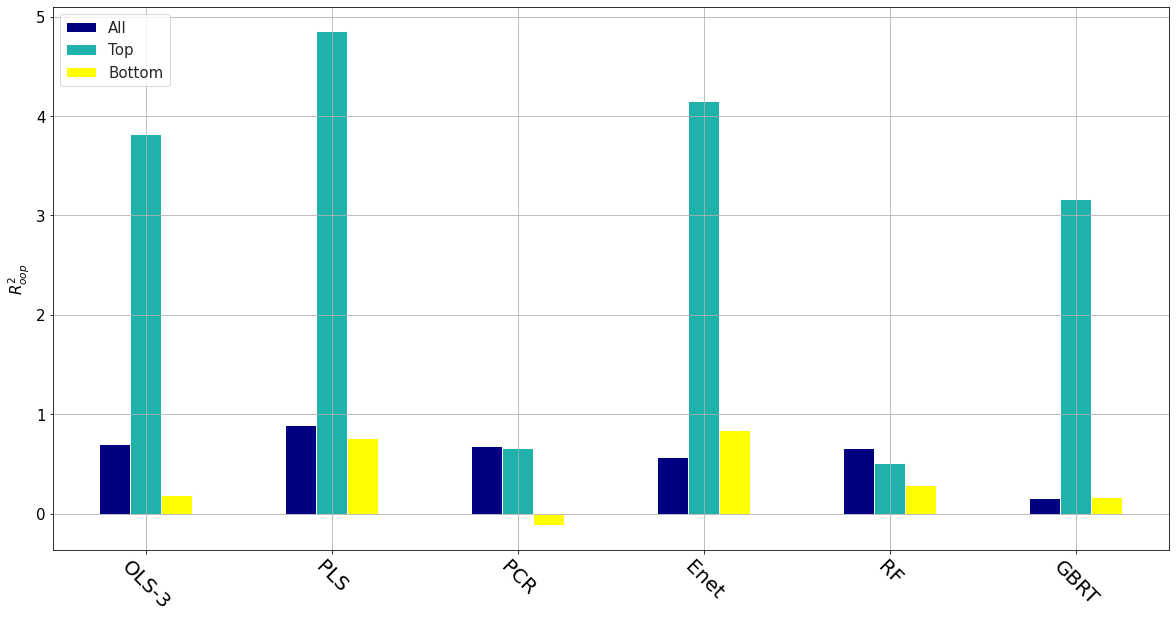

In [445]:
#copy from above R^2_oop
df = pd.DataFrame([ [0.006999914973159882, 0.03814143533317327, 0.0018318746877606928 ],
                    [0.008876279108704366,  0.0485145342039458, 0.007619643303896639],
                    [0.006837452966534485, 0.006625955187889998 , -0.0012013732402931243],
                   [0.005693752414002606, 0.04153723128101139, 0.008446537164198409 ],
                   [0.006624415318328802, 0.005091441090973814, 0.002854129588404697 ],
                   [0.0015578986274987772, 0.0316865413433588, 0.0016440074558997653 ] ],
                 index=['OLS-3', 'PLS', 'PCR', 'Enet', 'RF', 'GBRT'],
                 columns=pd.Index(['All', 'Top', 'Bottom']))

df=df*100

fig, ax = plt.subplots()

with sns.axes_style("whitegrid"):
    df.plot(kind='bar',figsize=(20,10),legend='upper center',color = ['navy', 'lightseagreen', 'yellow'], ax=ax)
    ax.legend(loc='upper left',fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=20, labelrotation=315)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel='$R_{oop}^2$',fontsize=15)

In [444]:
latex_print(df.round(3).T)

     0.7 & 0.888 & 0.684 & 0.569 & 0.662 & 0.156 \\ 
     3.814 & 4.851 & 0.663 & 4.154 & 0.509 & 3.169 \\ 
     0.183 & 0.762 & -0.12 & 0.845 & 0.285 & 0.164 \\ 


In [733]:
#DM
names=['OLS','OLS-3', 'PLS', 'PCR', 'Enet', 'RF', 'GBRT']
list_df=[OLS_df,OLS3_df,PLS_df,PCR_df,Enet_df,RF_df,GBRT_df]
output=[]
for i in range(7):
    temp=[]
    for j in range(7):
        df=list_df[i]['e_head']-list_df[j]['e_head']
        if (df.std()!=0) and (i<=j):
            temp.append(df.mean()/df.std())
        else:
            temp.append(0)
    output.append(temp)
df=pd.DataFrame(output,index=names,columns=names)
df

,OLS,OLS-3,PLS,PCR,Enet,RF,GBRT
OLS,0,0.212282,0.183056,0.217648,0.218405,0.181012,0.215787
OLS-3,0,0.000000,-0.428177,0.182679,0.189402,-0.243930,0.069899
PLS,0,0.000000,0.000000,0.472887,0.476941,-0.023001,0.358180
PCR,0,0.000000,0.000000,0.000000,0.055405,-0.307004,-0.033692
Enet,0,0.000000,0.000000,0.000000,0.000000,-0.308661,-0.042030
RF,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.266060
GBRT,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [742]:
df

,Enet,PLS,PCR,RF,GBRT
mvel1,5.749458,0.928031,0.044756,0.105137,0.132295
beta,-0.000000,0.202483,0.007106,0.000818,0.000000
betasq,9.770023,0.436169,0.007248,0.000594,0.000000
chmom,-0.000000,1.624076,0.007199,0.018503,0.046514
dolvol,-5.500005,6.007260,0.010487,0.006468,0.002872
...,...,...,...,...,...
std_dolvol,-0.000000,0.843998,0.007114,0.003264,0.000000
std_turn,-0.000000,0.844038,0.007506,0.001808,0.000000
zerotrade,-0.000000,1.322481,0.008234,0.002486,0.000000
bm,-0.000000,-0.275691,0.015112,0.006362,0.073153


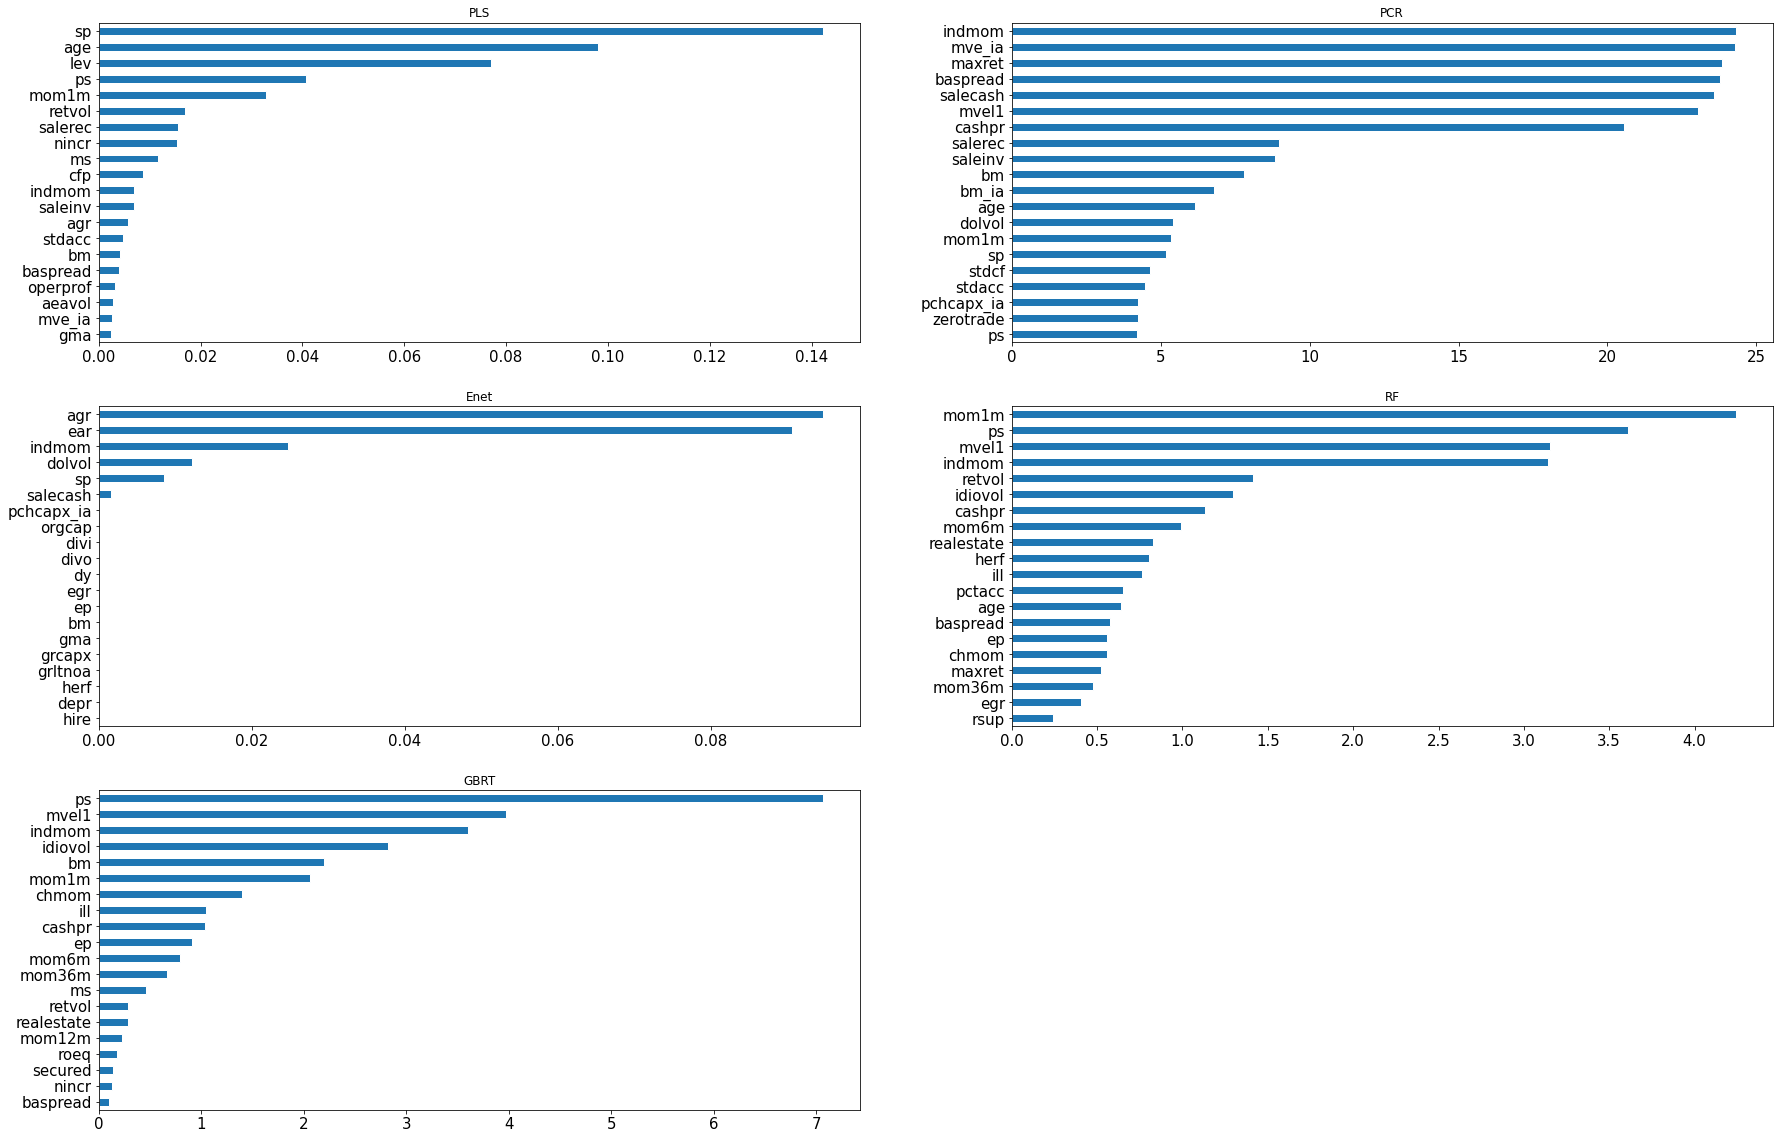

In [752]:
df = pd.DataFrame(PLS_feature_importances.sum(axis=1),columns=['PLS'])
df['PCR']=PCR_feature_importances.sum(axis=1).reset_index(drop=True)
df['Enet']=Enet_feature_importances.sum(axis=1)
df['RF']=RF_feature_importances.sum(axis=1)
df['GBRT']=GBRT_feature_importances.sum(axis=1)

df.index=data3.columns.drop(['RET', 'year_index'])
#df=(df*(df>0))/(df*(df>0)).sum()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

models=['PLS','PCR','Enet','RF','GBRT']
ax_array= [ax1,ax2,ax3,ax4,ax5]

with sns.axes_style("ticks"):
    for i in range(5):
        tempdf=df[models[i]].sort_values(ascending=False).head(20)
        ax=ax_array[i]
        tempdf.plot(kind='barh',figsize=(30,20), ax=ax)
        ax.tick_params(axis='x', which='major', labelsize=15)
        ax.tick_params(axis='y', which='major', labelsize=15)
        ax.set_title(models[i])
        ax.invert_yaxis()
    fig.delaxes(ax6)

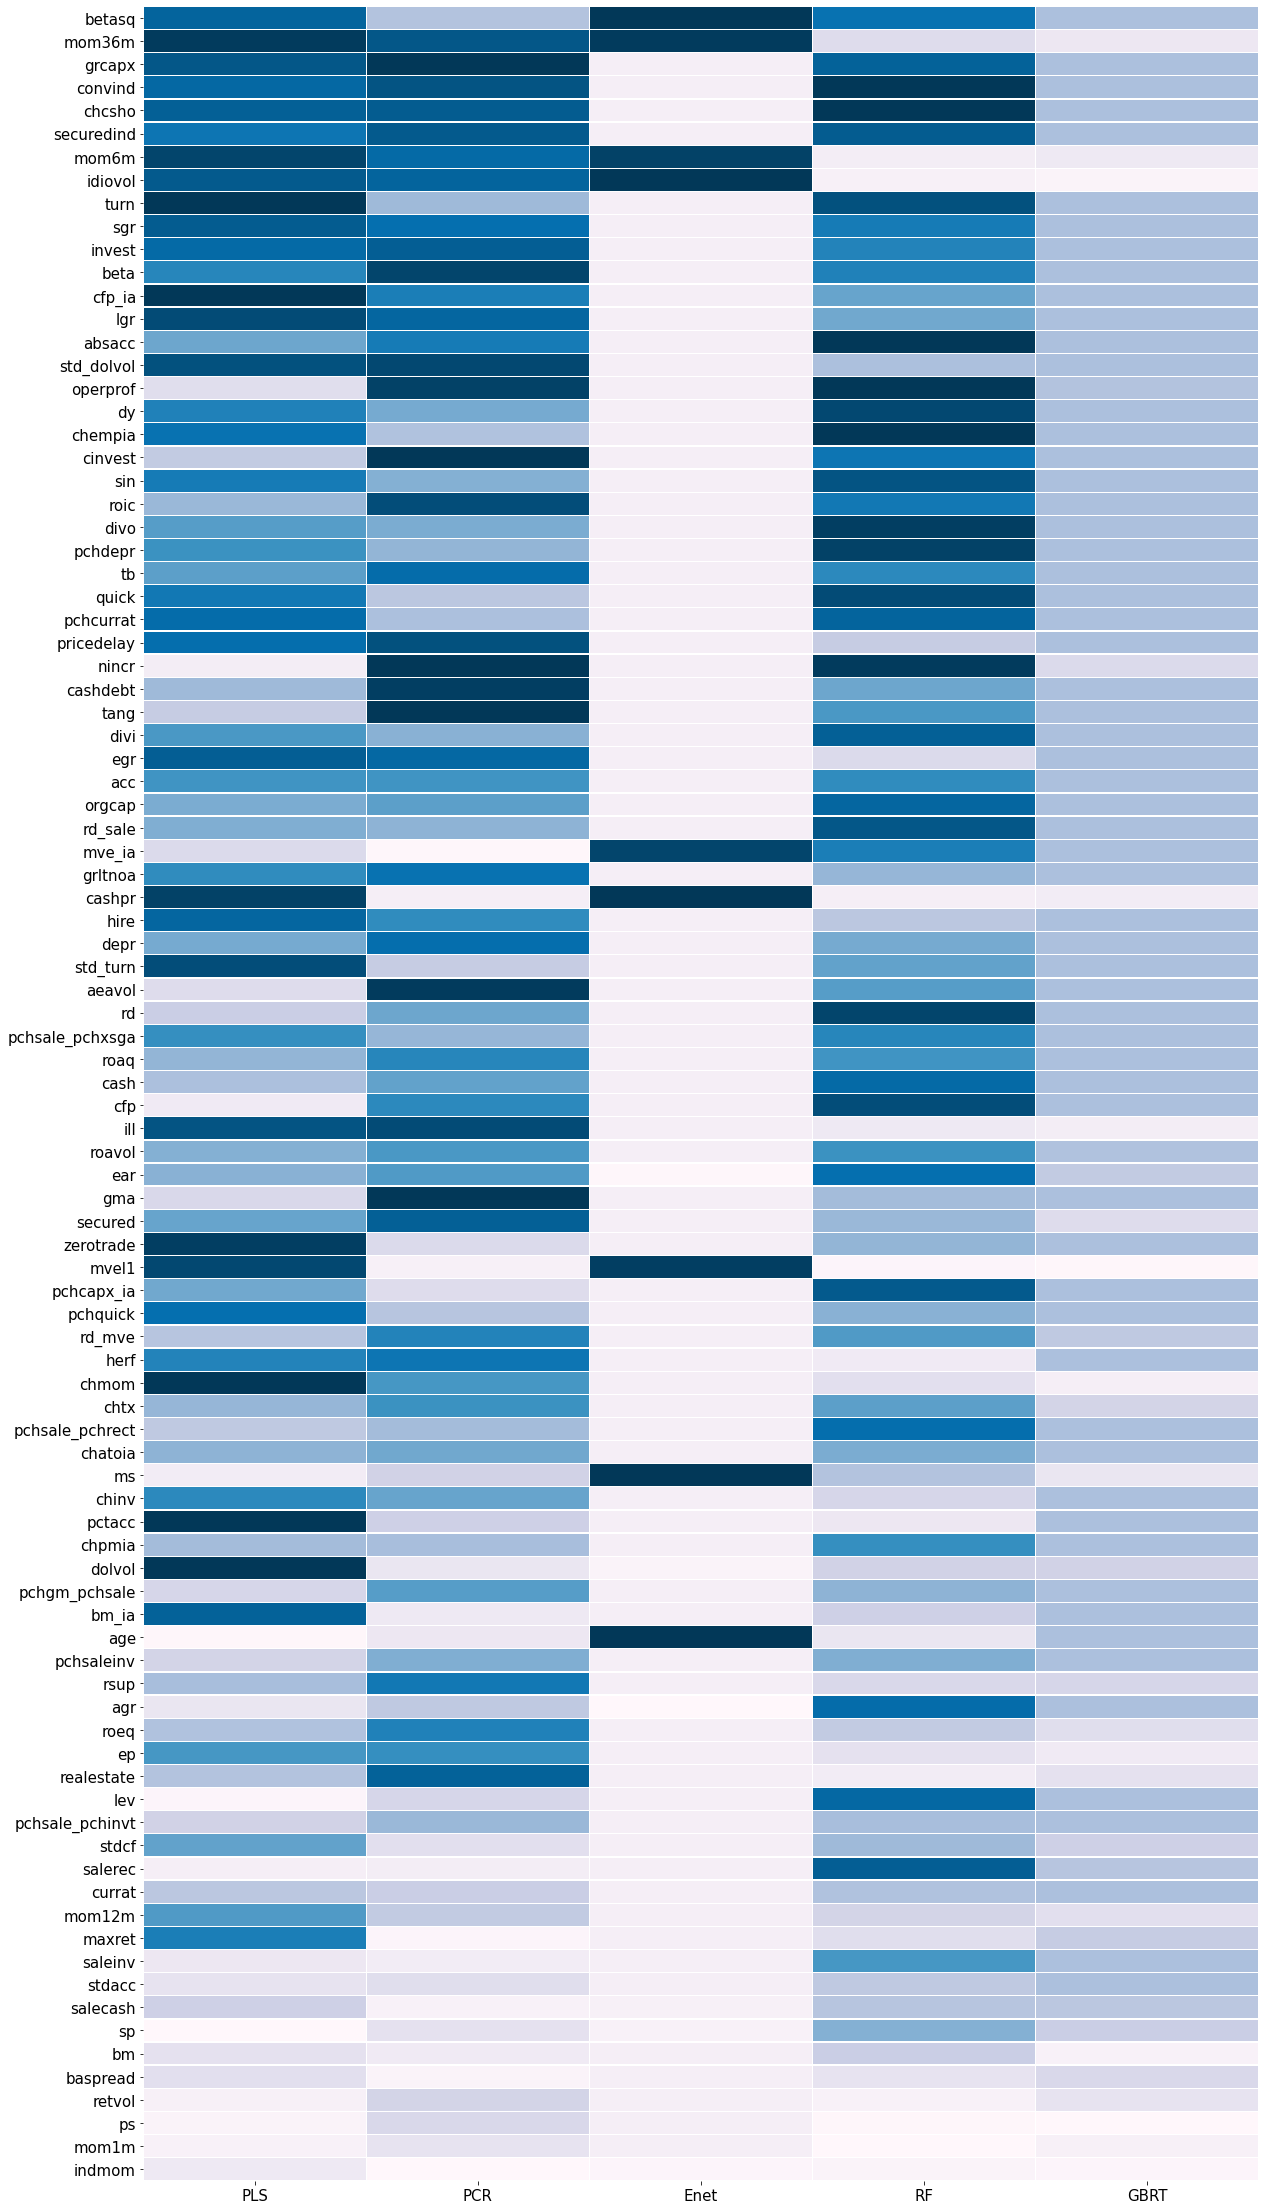

In [753]:
df = (94-df.rank(method='max'))/94
s=df.sum(axis=1)
df=df.reindex(s.sort_values(ascending=False).index)

fig, ax = plt.subplots(figsize=(20,40))

sns.heatmap(df, cmap="PuBu", vmin= 0, vmax=0.95, #or "Blues"
           linewidth=0.3 ,cbar=False, ax=ax)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15, labelrotation=0)

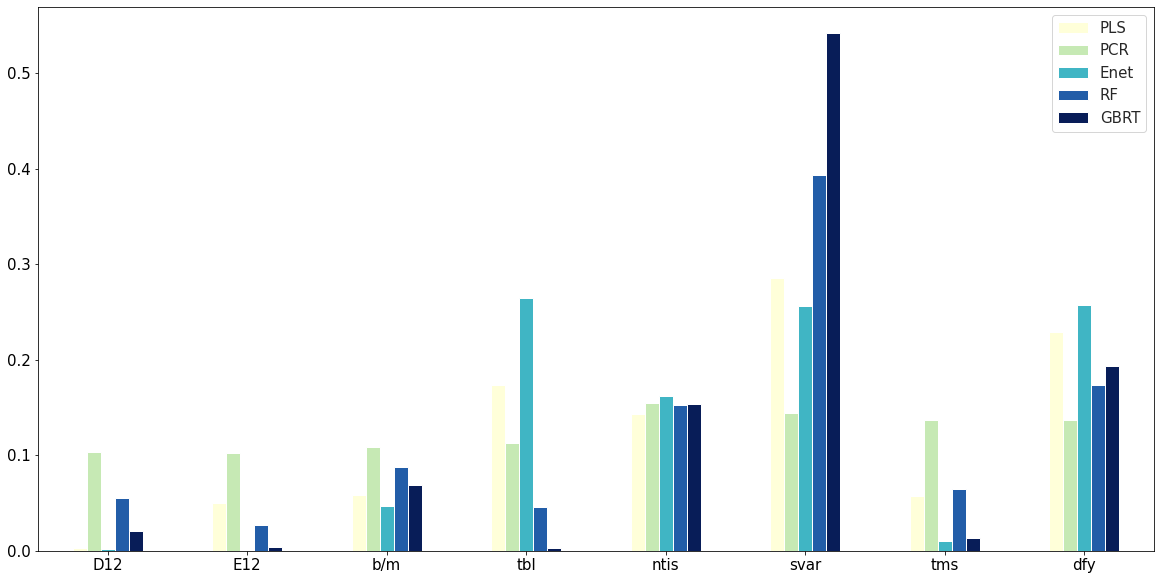

In [755]:
df = pd.DataFrame(PLSmac_feature_importances.sum(axis=1),columns=['PLS'])
df['PCR']=PCRmac_feature_importances.sum(axis=1).reset_index(drop=True)
df['Enet']=Enetmac_feature_importances.sum(axis=1)
df['RF']=RFmac_feature_importances.sum(axis=1)
df['GBRT']=GBRTmac_feature_importances.sum(axis=1)

df.index=data2.columns.drop(['RET', 'year_index'])
#df.index=['dp','ep','bm','tbl','ntis','svar','tms','dfy']
df=df.abs()
df=df/df.sum()

fig, ax = plt.subplots()

with sns.axes_style("white"):
    df.plot(kind='bar',figsize=(20,10),legend='upper right',cmap='YlGnBu', ax=ax)
    ax.tick_params(axis='x', labelsize=15, labelrotation=0)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(loc='upper right',fontsize=15)

In [661]:
df

,PLS,PCR,Enet,RF,GBRT
D12,0.002950,0.103359,0.001725,0.054847,0.012969
E12,0.049903,0.101966,0.000163,0.027387,0.006253
b/m,0.058260,0.109170,0.047043,0.088117,0.064765
tbl,0.173614,0.112774,0.265184,0.045724,0.003529
ntis,0.143300,0.155032,0.161931,0.153168,0.162652
svar,0.285189,0.143797,0.255879,0.393155,0.558488
tms,0.057508,0.136671,0.010540,0.064192,0.009587
dfy,0.229276,0.137231,0.257535,0.173410,0.181758


In [658]:
latex_print(df.round(3))

     0.003 & 0.103 & 0.002 & 0.055 & 0.013 \\ 
     0.05 & 0.102 & 0.0 & 0.027 & 0.006 \\ 
     0.058 & 0.109 & 0.047 & 0.088 & 0.065 \\ 
     0.174 & 0.113 & 0.265 & 0.046 & 0.004 \\ 
     0.143 & 0.155 & 0.162 & 0.153 & 0.163 \\ 
     0.285 & 0.144 & 0.256 & 0.393 & 0.558 \\ 
     0.058 & 0.137 & 0.011 & 0.064 & 0.01 \\ 
     0.229 & 0.137 & 0.258 & 0.173 & 0.182 \\ 
